<h1>Inhaltsverzeichnis</h1>

<ol>
    <li><a href="#einleitung">Einleitung</a>
    </li>
    <li><a href="#eigenständig">Eigenständigkeitserklärung</a>
    </li>
    <li><a href="#genutzter-datensatz">Genutzter Datensatz</a>
        <ul>
            <li><a href='#datensatz-anpassung'>Datensatz Anpassung</a></li>
            <li><a href="#was-bilden-die-daten-ab">Was bilden die Daten ab</a></li>
            <li><a href="#aufbau-des-datensatzes">Aufbau des Datensatzes</a></li> 
                <ul>
                    <li><a href="#variablen">Variablen</a></li>
                </ul>   
        </ul>
    </li>
    <li><a href="#analysen">Analysen</a>
        <ul>
            <li><a href="#ziel-der-analysen">Ziel der Analysen</a></li>
            <li><a href="#kmeans">KMeans</a></li>
            <li><a href="#hierarchisch">Hierarchisch</a></li>
        </ul>
    </li>
    <li><a href="#auswertung">Auswertung</a>
</ol>

<h1 id=einleitung>Einleitung</h1>

Im Rahmen des Moduls Datamining and Machine Learning werden wir einen, von uns ausgewählten, Datensatz mit der Clustering Methode statischtisch analysieren und auswerten. Dabei wählen wir geeigneten Methoden des Clustering-Algorithmen an, um Muster und Strukturen in den Daten zu identifizieren. Durch diese statistische Analyse erhalten wir Einblicke in die zugrunde liegenden Zusammenhänge und können die Daten entsprechend interpretieren. Die Ergebnisse unserer Auswertung ermöglichen es uns, Erkenntnisse zu gewinnen und möglicherweise Trends oder Gruppierungen in den Daten zu erkennen, die für weitere Entscheidungen oder Analysen relevant sein könnten.

<h1 id=eigenständig>Eigenständigkeitserklärung</h1>

Hiermit erkläre/n ich/wir, dass ich/wir die vorliegende Arbeit eigenständig und ohne fremde Hilfe angefertigt habe/n. Textpassagen, die wörtlich oder dem Sinn nach auf Publikationen oder Vorträgen anderer Autoren beruhen, sind als solche kenntlich gemacht.

<h1 id=genutzter-datensatz>Genutzter Datensatz</h1>

<h2 id=datensatz-anpassung>Datensatz Anpassung</h2>

Damit unser Output nur 90% des Orginalen Datensatz beinhält, werden mit dem unteren Skript zufällig Daten aus dem Datensatz ausgwählt. 

In [64]:
import os
import random
import csv

# Specify the path to the CSV files
input_file = './tripadvisor_review.csv'
output_file = './output.csv'
# Read the input CSV file
with open(input_file, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)
# Remove the first column from the data (it contains the user IDs)
data = [row[1:] for row in data]
# Keep the first row in the data for the header
header = data[0]
# Filter out possible duplicates from the data
input_file = list(set(tuple(row) for row in input_file))
# Calculate the number of rows to keep (90% of the total rows)
num_rows = int(len(data) * 0.9)
# Select random num_rows rows from the data
selected_data = random.sample(data[1:], num_rows)
# Add the header back to the selected data
selected_data.insert(0, header)
# Write the selected data to the output CSV file
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(selected_data)

<h2 id=was-bilden-die-daten-ab>Was bilden die Daten ab</h2>
Die Daten bilden das User Feedback zu verschiedenen Angeboten an Ferien Resorts in Asien auf einer Skala von 0 bis 4 ab. Diese werden dann mit der Durchschnittsbewertung des Resorts verglichen.

<h2 id=aufbau-des-datensatzes>Aufbau des Datensatzes</h2>

<h3 id=variablen>Variablen</h3>

Attribute 1 : Unique user id  
Attribute 2 : Average user feedback on art galleries  
Attribute 3 : Average user feedback on dance clubs  
Attribute 4 : Average user feedback on juice bars  
Attribute 5 : Average user feedback on restaurants   
Attribute 6 : Average user feedback on museums    
Attribute 7 : Average user feedback on resorts    
Attribute 8 : Average user feedback on parks/picnic spots    
Attribute 9 : Average user feedback on beaches   
Attribute 10 : Average user feedback on theaters   
Attribute 11 : Average user feedback on religious   


<h1 id=analysen>Analysen</h1>

<h2 id=ziel-der-analysen>Ziel der Analysen</h2>

Das Ziel der Analysen ist es, die User zu clustern und die Cluster zu analysieren. Dadurch können die Resorts besser auf die Bedürfnisse der User angepasst werden.


<h2 id=kmeans>KMeans</h2>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [66]:
# Load the data from the CSV file
df = pd.read_csv('./output.csv')
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.77,1.16,1.62,0.57,0.56,1.40,3.18,2.78,1.12,2.54
1,0.61,1.52,0.18,0.26,0.80,1.40,3.17,2.77,1.22,3.04
2,0.99,1.36,1.18,0.67,0.96,2.32,3.19,3.07,1.98,2.96
3,0.42,1.08,0.74,0.91,0.90,2.30,3.18,2.87,1.25,2.96
4,0.58,1.48,0.21,0.46,0.40,1.28,3.17,2.72,1.95,3.22
...,...,...,...,...,...,...,...,...,...,...
877,0.90,1.36,1.42,0.55,0.86,1.48,3.18,2.89,1.73,2.94
878,0.80,0.96,0.73,0.61,1.10,2.82,3.18,2.99,2.14,2.54
879,0.96,1.96,0.26,0.51,0.82,1.34,3.18,3.02,1.89,2.72
880,0.74,1.64,0.18,0.55,0.94,2.00,3.18,2.74,1.50,2.98


In [67]:
# Describe the data
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.891497,1.351338,1.017041,0.528515,0.951859,1.856803,3.180998,2.836429,1.572517,2.797891
std,0.321618,0.475208,0.788397,0.255978,0.445526,0.534412,0.007867,0.138469,0.365497,0.322123
min,0.340000,0.000000,0.130000,0.170000,0.060000,0.380000,3.160000,2.420000,0.740000,2.140000
25%,0.700000,1.080000,0.270000,0.410000,0.640000,1.480000,3.180000,2.740000,1.310000,2.500000
50%,0.830000,1.280000,0.830000,0.500000,0.900000,1.820000,3.180000,2.820000,1.520000,2.780000
75%,1.020000,1.590000,1.580000,0.580000,1.220000,2.220000,3.180000,2.930000,1.760000,3.040000
max,3.220000,3.640000,3.620000,2.910000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [68]:
# Scale the data and fit the KMeans model
scaler = StandardScaler()
df[['Category 1_T','Category 2_T','Category 3_T','Category 4_T','Category 5_T','Category 6_T','Category 7_T','Category 8_T','Category 9_T','Category 10_T'
]] = scaler.fit_transform(df[['Category 1','Category 2','Category 3','Category 4','Category 5','Category 6','Category 7','Category 8','Category 9','Category 10'
]])
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 1_T,Category 2_T,Category 3_T,Category 4_T,Category 5_T,Category 6_T,Category 7_T,Category 8_T,Category 9_T,Category 10_T
0,0.77,1.16,1.62,0.57,0.56,1.40,3.18,2.78,1.12,2.54,-0.377981,-0.402869,0.765225,0.162158,-0.880043,-0.855261,-0.126900,-0.407748,-1.238791,-0.801052
1,0.61,1.52,0.18,0.26,0.80,1.40,3.17,2.77,1.22,3.04,-0.875748,0.355124,-1.062302,-1.049570,-0.341048,-0.855261,-1.398787,-0.480008,-0.965035,0.752030
2,0.99,1.36,1.18,0.67,0.96,2.32,3.19,3.07,1.98,2.96,0.306448,0.018238,0.206814,0.553038,0.018282,0.867233,1.144986,1.687768,1.115508,0.503537
3,0.42,1.08,0.74,0.91,0.90,2.30,3.18,2.87,1.25,2.96,-1.466846,-0.571311,-0.351597,1.491150,-0.116467,0.829788,-0.126900,0.242584,-0.882908,0.503537
4,0.58,1.48,0.21,0.46,0.40,1.28,3.17,2.72,1.95,3.22,-0.969079,0.270903,-1.024229,-0.267810,-1.239373,-1.079934,-1.398787,-0.841303,1.033381,1.311139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.90,1.36,1.42,0.55,0.86,1.48,3.18,2.89,1.73,2.94,0.026454,0.018238,0.511402,0.083982,-0.206299,-0.705479,-0.126900,0.387103,0.431119,0.441413
878,0.80,0.96,0.73,0.61,1.10,2.82,3.18,2.99,2.14,2.54,-0.284650,-0.823976,-0.364288,0.318510,0.332696,1.803372,-0.126900,1.109695,1.553516,-0.801052
879,0.96,1.96,0.26,0.51,0.82,1.34,3.18,3.02,1.89,2.72,0.213117,1.281560,-0.960773,-0.072370,-0.296132,-0.967598,-0.126900,1.326472,0.869127,-0.241943
880,0.74,1.64,0.18,0.55,0.94,2.00,3.18,2.74,1.50,2.98,-0.471312,0.607788,-1.062302,0.083982,-0.026634,0.268105,-0.126900,-0.696785,-0.198519,0.565660


<h2>Anzahl an Cluster bestimmen</h2>

Die Methode "optimise_k_means" ermittelt die optimale Anzahl von Clustern für die Anwendung der K-Means-Methode, um eine angemessene Gruppierung der Daten zu erreichen.

In [69]:
# Defining a function to optimise the number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

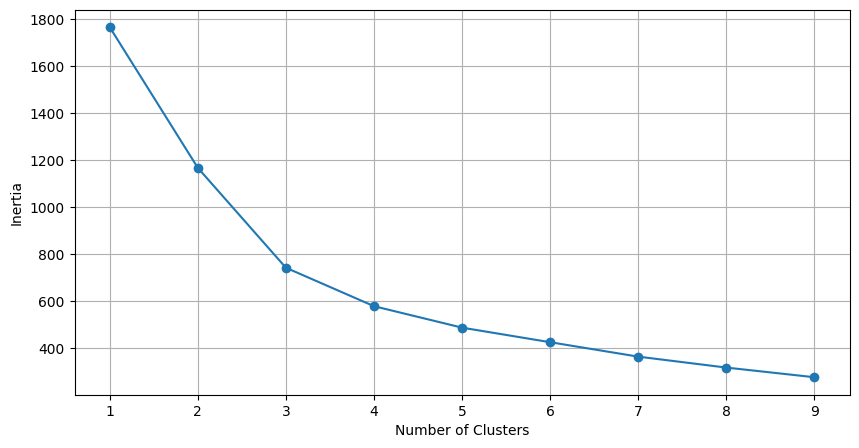

In [70]:
# Using the function to optimise the number of clusters
optimise_k_means(df[['Category 1_T','Category 2_T']], 10)

In [71]:
# Doing the KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['Category 1_T','Category 2_T']])
df['kmeans_5'] = kmeans.labels_
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 2_T,Category 3_T,Category 4_T,Category 5_T,Category 6_T,Category 7_T,Category 8_T,Category 9_T,Category 10_T,kmeans_5
0,0.77,1.16,1.62,0.57,0.56,1.40,3.18,2.78,1.12,2.54,...,-0.402869,0.765225,0.162158,-0.880043,-0.855261,-0.126900,-0.407748,-1.238791,-0.801052,2
1,0.61,1.52,0.18,0.26,0.80,1.40,3.17,2.77,1.22,3.04,...,0.355124,-1.062302,-1.049570,-0.341048,-0.855261,-1.398787,-0.480008,-0.965035,0.752030,2
2,0.99,1.36,1.18,0.67,0.96,2.32,3.19,3.07,1.98,2.96,...,0.018238,0.206814,0.553038,0.018282,0.867233,1.144986,1.687768,1.115508,0.503537,0
3,0.42,1.08,0.74,0.91,0.90,2.30,3.18,2.87,1.25,2.96,...,-0.571311,-0.351597,1.491150,-0.116467,0.829788,-0.126900,0.242584,-0.882908,0.503537,2
4,0.58,1.48,0.21,0.46,0.40,1.28,3.17,2.72,1.95,3.22,...,0.270903,-1.024229,-0.267810,-1.239373,-1.079934,-1.398787,-0.841303,1.033381,1.311139,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.90,1.36,1.42,0.55,0.86,1.48,3.18,2.89,1.73,2.94,...,0.018238,0.511402,0.083982,-0.206299,-0.705479,-0.126900,0.387103,0.431119,0.441413,0
878,0.80,0.96,0.73,0.61,1.10,2.82,3.18,2.99,2.14,2.54,...,-0.823976,-0.364288,0.318510,0.332696,1.803372,-0.126900,1.109695,1.553516,-0.801052,0
879,0.96,1.96,0.26,0.51,0.82,1.34,3.18,3.02,1.89,2.72,...,1.281560,-0.960773,-0.072370,-0.296132,-0.967598,-0.126900,1.326472,0.869127,-0.241943,1
880,0.74,1.64,0.18,0.55,0.94,2.00,3.18,2.74,1.50,2.98,...,0.607788,-1.062302,0.083982,-0.026634,0.268105,-0.126900,-0.696785,-0.198519,0.565660,2


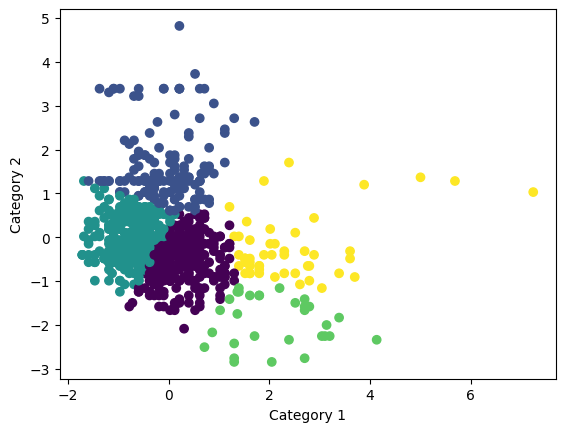

In [72]:
# Plotting the clusters
plt.scatter(df['Category 1_T'], df['Category 2_T'], c=df['kmeans_5'],)
plt.xlabel('Category 1')
plt.ylabel('Category 2')
plt.show()

<h2 id=hierarchisch>Hierarchisch</h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
dataset = pd.read_csv('./output.csv')
points = dataset.iloc[:, [8, 9]].values

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

In [ ]:
plt.scatter(dataset.iloc[:, 8], dataset.iloc[:, 9])
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')

In [ ]:
y_hc = hc.fit_predict(points)

In [ ]:
plt.scatter(points[y_hc == 0, 0], points[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(points[y_hc == 1, 0], points[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(points[y_hc == 2, 0], points[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(points[y_hc == 3, 0], points[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(points[y_hc == 4, 0], points[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')

<h1 id=auswertung>Auswertung</h1>
